In [1]:
import scipy.misc
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
import random
from sklearn.neighbors import KernelDensity
import math

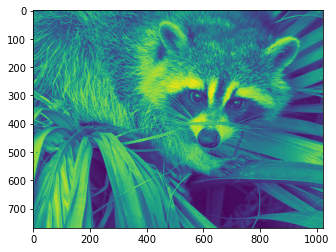

In [2]:
face = scipy.misc.face(gray=True)
plt.imshow(face)

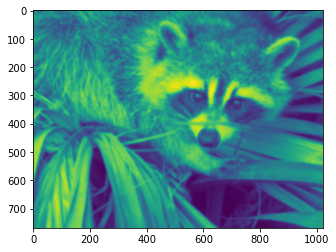

In [3]:
blurred_face = ndimage.gaussian_filter(face, sigma=3)
plt.imshow(blurred_face)

In [4]:
linearize_image = blurred_face.flatten().reshape((-1, 1))
pdf = linearize_image / np.sum(linearize_image)
cdf = np.cumsum(pdf)

In [5]:
np.random.seed(1)
sample_num = 50000
ucdf_array = np.random.uniform(0, 1, sample_num)
# count, bins, ignored = plt.hist(ucdf_array, 1000, density=True)
# bins[990:998]
print(ucdf_array[1000:1010])
print(ucdf_array.shape)

[0.32580997 0.88982734 0.75170772 0.7626321  0.46947903 0.2107645
 0.04147508 0.3218288  0.03711266 0.69385541]
(50000,)


In [6]:
pixel_position = []
for i in range (0,sample_num):
    q = np.searchsorted(cdf, ucdf_array[i])
    pixel_position.append(q)
print(pixel_position[70000:70010])

[]


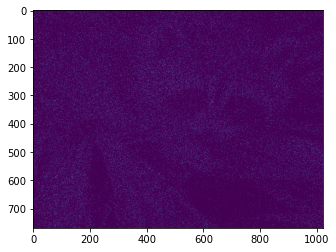

In [7]:
new_image = np.empty((face.shape[0]*face.shape[1],1))
pixel_position_array = np.array(pixel_position).reshape((-1,1))

for i in range (0, sample_num):
    x = pixel_position[i]
    if new_image[x,0] == 0:
        new_image[x,0] = new_image[x,0] + len(np.argwhere(pixel_position_array == x))
    else:
        pass

new_image_2d = (np.reshape(new_image.squeeze(), (face.shape[0], face.shape[1]))).astype(np.uint8)

plt.imshow(new_image_2d)
plt.show()

In [8]:
## Test
print(new_image[5000:5100].T)
print(new_image_2d.shape)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0.]]
(768, 1024)


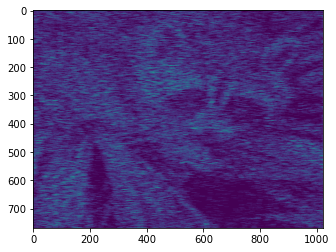

In [11]:
## Build Kernel
xaxis = np.arange(0, len(linearize_image)).reshape((-1,1))
kde = KernelDensity(kernel = 'tophat', bandwidth = 10).fit(pixel_position_array)
pdf_vals = np.exp(kde.score_samples(xaxis))
im_2d = (np.reshape(pdf_vals.squeeze(), (face.shape[0], face.shape[1])))
plt.imshow(im_2d)
plt.show()

In [10]:
## Test
print(pdf_vals[5000:5030].T)

[0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 5.0e-07 5.0e-07
 5.0e-07 1.0e-06 1.0e-06 1.0e-06 1.0e-06 1.0e-06 1.5e-06 1.5e-06 1.5e-06
 2.0e-06 2.0e-06 2.0e-06]


In [11]:
from sklearn.model_selection import KFold
n_splits=10
kf = KFold(n_splits)

In [12]:
def get_score(model, train, test):
    model.fit(train)
    return np.exp(model.score_samples(test))

In [13]:
def calculate_log(kde_list):
    kde_array = np.array(kde_list)
    total = 0
    for i in range (0, kde_array.shape[0]):
        for j in range (0, kde_array.shape[1]):
            if kde_array[i,j]!=0:
                total = math.log(kde_array[i,j]) + total
            else:
                pass
    return total

In [14]:
from sklearn.model_selection import KFold
n_splits=5
kf = KFold(n_splits)

kde_b = []
probability = []
band = [9, 15, 25]

for b in range (0,len(band)):
    kde_b = []
    for train_index, test_index in kf.split(pixel_position_array):
        train, test = pixel_position_array[train_index], pixel_position_array[test_index]
        kde_b.append(get_score(KernelDensity(kernel = 'tophat', bandwidth = band[b]), train, test))
    probability.append((calculate_log(kde_b)))

In [15]:
print(probability)

[-1132931.9203355487, -1280990.8201338022, -1338091.7179409915]


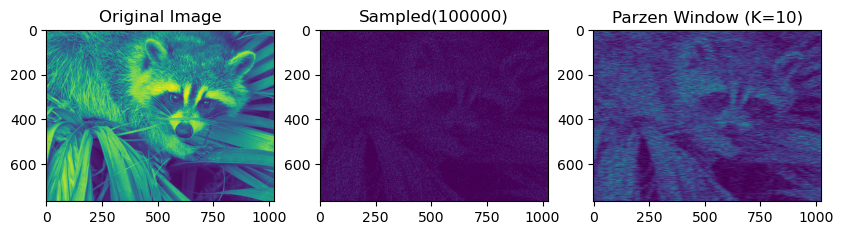

In [16]:
##### Plot & Save figure

fig = plt.figure(figsize=(10, 10), dpi=100)

ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title("Original Image")
ax1.imshow(face)

ax2 = fig.add_subplot(1, 3, 2)
ax2.set_title("Sampled(100000)")
ax2.imshow(new_image_2d)

ax3 = fig.add_subplot(1, 3, 3)
ax3.set_title("Parzen Window (K=10)")
ax3.imshow(im_2d)

fig.savefig("Saved_images_grp35.jpg", dpi=200, bbox_inches='tight')

## Task 2 Start

In [12]:
## Samples from background distribution
xaxis = np.arange(0, len(linearize_image)).reshape((-1,1))
background = xaxis
for pixel in pixel_position:
    background = np.delete(background, np.where(background == pixel))

In [13]:
## Test
print(xaxis.shape)
print(background.shape)

(786432, 1)
(738432,)


In [66]:
background_sample = np.random.choice(background, sample_num)
print(background_sample.shape)

(50000,)


In [67]:
## Test
print(background_sample[1000:1010])

[366679  40237 590908 377456 506119 630246 406632 407401 618005  73387]


In [68]:
combined_array = np.sort(np.concatenate((pixel_position_array, background_sample), axis=None))

In [69]:
print(combined_array.shape)
print(combined_array[1000:1010])

(100000,)
[7856 7869 7872 7879 7879 7882 7895 7906 7925 7966]


In [70]:
y_value = []
for i in combined_array:
    if i in pixel_position_array:
        y_value.append(1)
    elif i in background_sample:
        y_value.append(0)
print(len(y_value))       

100000


In [71]:
combined_array = combined_array.reshape(-1,1)
y_value = np.array(y_value).reshape(-1,1)

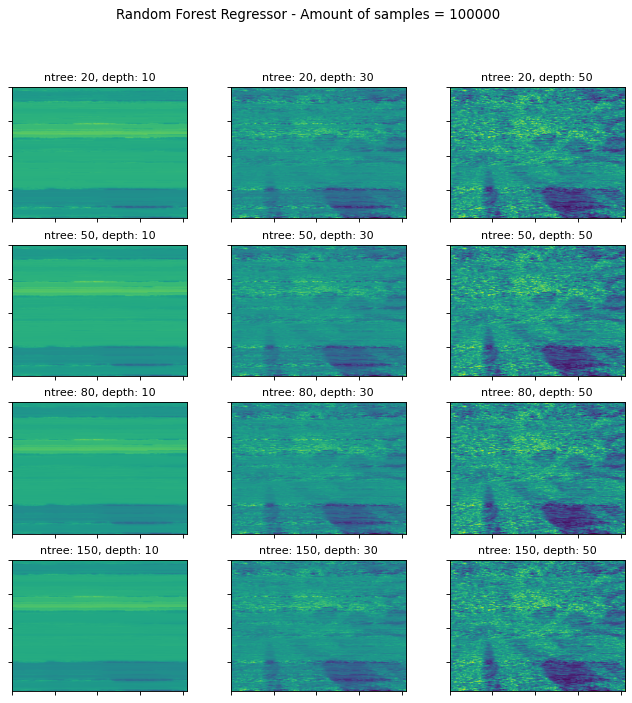

In [72]:
# Random Forest Regressor
import time
fig = plt.figure(figsize=(10, 10), dpi=80)

from sklearn.ensemble import RandomForestRegressor
n_estimators = [20,50,80,150]
max_depth = [10,30,50]
im_row = math.ceil((len(n_estimators)*len(max_depth))/3)
im = 1
for i in n_estimators:
    for j in max_depth:
        start_time = time.time()
        rf_regr = RandomForestRegressor(n_estimators = i, max_depth = j, random_state = 0)
        rf_regr.fit(combined_array, np.squeeze(y_value))
        rf_prediction = rf_regr.predict(xaxis)
        rfim_2d = (np.reshape(rf_prediction.squeeze(), (face.shape[0], face.shape[1])))
        elapsed_time = time.time() - start_time
        ax = fig.add_subplot(im_row, 3, im)
        im = im + 1
        title = "ntree: "+ str(i)+ ", depth: "+ str(j)
        ax.set_title(title, fontsize = 10)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.imshow(rfim_2d)
fig.suptitle('Random Forest Regressor - Amount of samples = 100000')
plt.show()
fig.savefig("Random Forest Regressor.jpg", dpi=200, bbox_inches='tight')

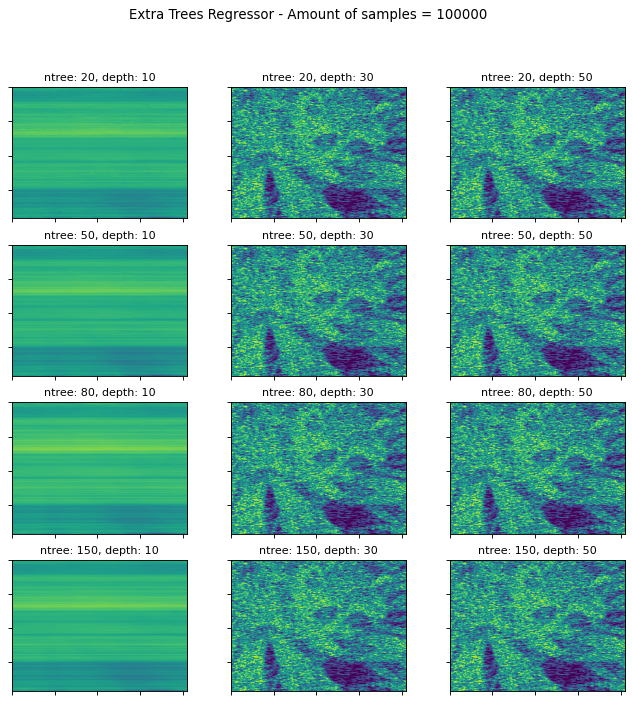

In [73]:
# Extra Trees Regressor
import time
fig = plt.figure(figsize=(10, 10), dpi=80)

from sklearn.ensemble import ExtraTreesRegressor
n_estimators = [20,50,80,150]
max_depth = [10,30,50]
im_row = math.ceil((len(n_estimators)*len(max_depth))/3)
im = 1
for i in n_estimators:
    for j in max_depth:
        start_time = time.time()
        extree_regr = ExtraTreesRegressor(n_estimators = i, max_depth = j, random_state = 0)
        extree_regr.fit(combined_array, np.squeeze(y_value))
        extree_prediction = extree_regr.predict(xaxis)
        extree_im_2d = (np.reshape(extree_prediction.squeeze(), (face.shape[0], face.shape[1])))
        elapsed_time = time.time() - start_time
        ax = fig.add_subplot(im_row, 3, im)
        im = im + 1
        title = "ntree: "+ str(i)+ ", depth: "+ str(j)
        ax.set_title(title, fontsize = 10)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.imshow(extree_im_2d)
fig.suptitle('Extra Trees Regressor - Amount of samples = 100000')
plt.show()
fig.savefig("Extra Trees Regressor.jpg", dpi=200, bbox_inches='tight')

In [87]:
from sklearn.ensemble import RandomForestRegressor
rf_regr = RandomForestRegressor(n_estimators=80, max_depth=50, random_state=0)
rf_regr.fit(combined_array, np.squeeze(y_value))
rf_prediction = rf_regr.predict(xaxis)

In [88]:
print(rf_prediction[1000:1010])

[0.52020797 0.52020797 0.52020797 0.53270797 0.53270797 0.53270797
 0.11395797 0.11395797 0.11395797 0.11395797]


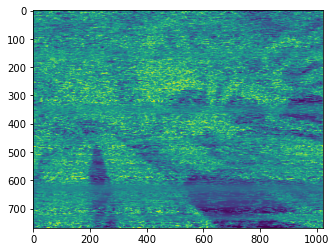

In [89]:
rfim_2d = (np.reshape(rf_prediction.squeeze(), (face.shape[0], face.shape[1])))
plt.imshow(rfim_2d)
plt.show()

In [28]:
from sklearn.ensemble import ExtraTreesRegressor
extree_reg = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(combined_array, y_value)
extree_prediction = extree_reg.predict(xaxis)

<ipython-input-28-fddc0520b135>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extree_reg = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(combined_array, y_value)


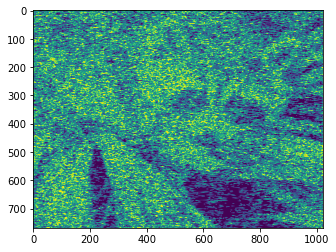

In [29]:
extreeim_2d = (np.reshape(extree_prediction.squeeze(), (face.shape[0], face.shape[1])))
plt.imshow(extreeim_2d)
plt.show()

# Exploring the amount of trees and maximum height

In [39]:
from sklearn.ensemble import RandomForestRegressor
# get a list of models to evaluate the amount of trees
def ntree_get_models():
    ntree_models = dict()
    n_estimators_list = [80]
    for i in n_estimators_list:
        ntree_models["n_estimators: " + str(i)] = RandomForestRegressor(n_estimators=i, max_depth=50, random_state=0)
    return ntree_models

In [47]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=5, n_jobs=-1)
    #print(cv)
    return scores

In [49]:
from numpy import mean
from numpy import std
import time
# Get Dataset
X = combined_array.reshape(-1,1)
y = y_value.reshape(-1,1)
# get the models to evaluate
ntree_models = ntree_get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in ntree_models.items():
    start_time = time.time()
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    elapsed_time = time.time() - start_time
    # summarize the performance along the way
    print('>%s %f (%f) (%.3f) minutes' % (name, mean(scores), std(scores), elapsed_time/60))

>n_estimators: 80 nan (nan) (1.091) minutes


# Using manual cross validation function

In [93]:
from sklearn.model_selection import KFold

def ntree_get_models():
    ntree_models = dict()
    n_estimators_list = [80]
    for i in n_estimators_list:
        ntree_models["n_estimators: " + str(i)] = RandomForestRegressor(n_estimators=i, max_depth=50, random_state=0)
    return ntree_models
    
def calculate_log(lst):
    array = np.array(lst).reshape(1, -1)
    total = 0
    for i in range (0, array.shape[0]):
        for j in range (0, array.shape[1]):
            if array[i,j]!=0:
                total = math.log(array[i,j]) + total
            else:
                pass
    return total

def get_score(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    return np.exp(model.score(X_test, y_test))

def evaluate_model(model, X, y):
    n_splits = 5
    kf = KFold(n_splits)
    rf_ntree = []
    scores = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rf_ntree.append(get_score(model, X_train, y_train, X_test, y_test))
    scores.append((calculate_log(rf_ntree)))
    return scores

In [94]:
from numpy import mean
from numpy import std
import time
# Get Dataset
X = combined_array.reshape(-1,1)
y = np.squeeze(y_value)
# get the models to evaluate
ntree_models = ntree_get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in ntree_models.items():
    start_time = time.time()
    # evaluate the model
    scores = evaluate_model(model, X, y)
#     rf_ntree = evaluate_model(model, X, y)
#     print(rf_ntree)
    # store the results
    results.append(scores)
    names.append(name)
    elapsed_time = time.time() - start_time
    # summarize the performance along the way
    print('>%s %f (%f) (%.3f) minutes' % (name, mean(scores), std(scores), elapsed_time/60))

>n_estimators: 80 -2.032313 (0.000000) (3.466) minutes


# Make Moons

In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
data, labels = make_moons(1000, noise=0.035, random_state=20)

[Text(0.5, 0, 'X'), Text(0, 0.5, 'Y'), Text(0.5, 1.0, 'Moons')]

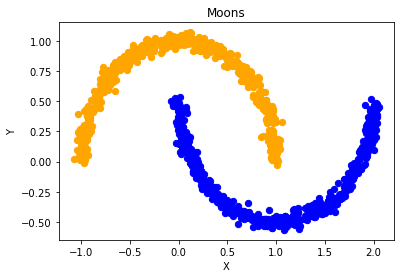

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.scatter(data[labels==0, 0], data[labels==0, 1], c='orange', s=40, label='oranges')
ax.scatter(data[labels==1, 0], data[labels==1, 1], c='blue', s=40, label='blues')

ax.set(xlabel='X', ylabel='Y', title='Moons')

#ax.legend(loc='upper right');

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=42)

In [4]:
print(X_train.shape)
print(y_train.shape)

(670, 2)
(670,)


In [37]:
from sklearn.ensemble import RandomForestRegressor
moonrf_regr = RandomForestRegressor(n_estimators=10, max_depth=50, min_samples_leaf=1, max_leaf_nodes=50, random_state=0)
moonrf_regr.fit(X_train, (y_train))
moonrf_prediction = moonrf_regr.predict(X_test)

[Text(0.5, 0, 'X_test'), Text(0, 0.5, 'y_test'), Text(0.5, 1.0, 'Moons')]

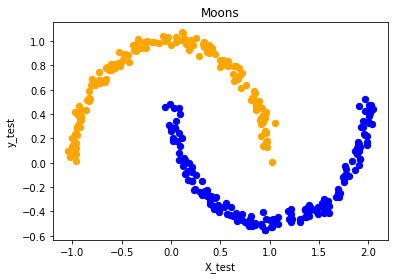

In [38]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], c='orange', s=40, label='oranges')
ax.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], c='blue', s=40, label='blues')

ax.set(xlabel='X_test', ylabel='y_test', title='Moons')

#ax.legend(loc='upper right');